In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("K Means Clustering.xlsx")

In [3]:
data.head()

,Name,Age,Income
0,N1,27,105000
1,N2,29,135000
2,N3,29,91500
3,N4,28,90000
4,N5,42,225000


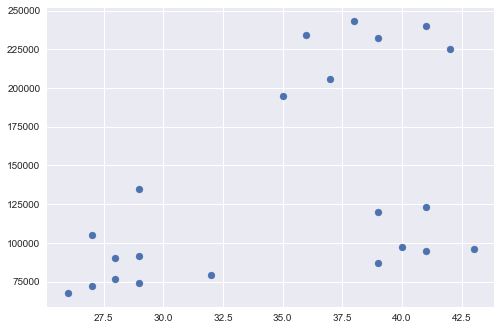

In [4]:
plt.style.use("seaborn")
plt.figure(0)

plt.scatter(data['Age'],data['Income'])  
plt.show()

In [5]:
 X1 = data["Age"].values
 X2 = data["Income"].values

 X1 = (X1-np.mean(X1))/np.std(X1)
 X2 = (X2-np.mean(X2))/np.std(X2)

 X = np.column_stack((X1,X2))
 print(X.shape)

(22, 2)


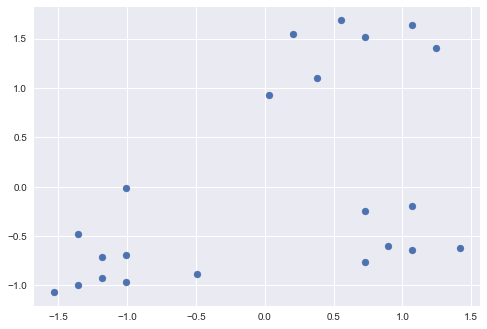

In [6]:
plt.figure(0)

plt.scatter(X1,X2)  
plt.show()

## **K Means Clustering Algorithm**

### 1. Random Initialisation

In [7]:
k = 3                                                      # specifying how many clusters we want to have
colour = ["green","red","purple"]                          # specifying colour for each of the cluster
clusters = {}                                              # dictionary of all the clusters

for i in range(k):
    
    # initialising one random center for each cluster in the range (-1.5,1.5)
    center = 1.5*(2*np.random.random((X.shape[1],))-1)    # generating one data point having 2 features

    # we also need an assignment list (so with each cluster center, we associate a list)
    points = []                            # contains points assigned to / associated with that cluster
    
    # for every cluster we create one dictionary (this is the ith cluster)
    cluster = {
        'center': center,
        'points': points,
        'colour': colour[i]
    }
    clusters[i] = cluster

In [8]:
clusters

{0: {'center': array([ 0.49841014, -1.34623009]),
  'points': [],
  'colour': 'green'},
 1: {'center': array([0.76164261, 1.01725974]), 'points': [], 'colour': 'red'},
 2: {'center': array([-1.4920082 ,  0.66873958]),
  'points': [],
  'colour': 'purple'}}

### 2. Implementing E Step

In [9]:
# helper function to compute distance between 2 vectors or points (we use euclidean distance)

def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [10]:
def assignPointToClusters(clusters):
    
    # iterating over all the training data points
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]        # current data point

        # computing the distance of current data point from the center of the kth cluster
        for kx in range(k):
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)

        # choosing the cluster which has the minimum distance
        current_cluster = np.argmin(dist)

        clusters[current_cluster]['points'].append(curr_x)
    
    return 

In [11]:
assignPointToClusters(clusters)

In [12]:
clusters

{0: {'center': array([ 0.49841014, -1.34623009]),
  'points': [array([-1.00915747, -0.9629726 ]),
   array([-0.48881065, -0.88063069]),
   array([ 0.89878087, -0.59831557]),
   array([ 1.07222982, -0.64536809]),
   array([ 1.4191277 , -0.62184183]),
   array([ 0.72533193, -0.24542167]),
   array([ 0.72533193, -0.76299939])],
  'colour': 'green'},
 1: {'center': array([0.76164261, 1.01725974]),
  'points': [array([1.24567876, 1.40141653]),
   array([0.72533193, 1.51904783]),
   array([1.07222982, 1.63667914]),
   array([0.55188299, 1.68373166]),
   array([0.20498511, 1.54257409]),
   array([0.03153617, 0.93089133]),
   array([0.37843405, 1.09557515]),
   array([ 1.07222982, -0.19836915])],
  'colour': 'red'},
 2: {'center': array([-1.4920082 ,  0.66873958]),
  'points': [array([-1.35605536, -0.48068427]),
   array([-1.00915747, -0.01015907]),
   array([-1.00915747, -0.69242061]),
   array([-1.18260641, -0.71594687]),
   array([-1.5295043 , -1.06884077]),
   array([-1.35605536, -0.998261

In [13]:
# function to see if we are able to plot the cluster centers and the points associated with them

def plotCluster(clusters):
    # iterate over every cluster
    for kx in range(k):

        # converting the list to numpy array so that we can give it to matplotlib function
        pts = np.array(clusters[kx]['points'])

        # PLOTTING THE POINTS
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['colour'])
        except:
            pass
        
        # PLOTTING THE CLUSTER CENTERS
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')

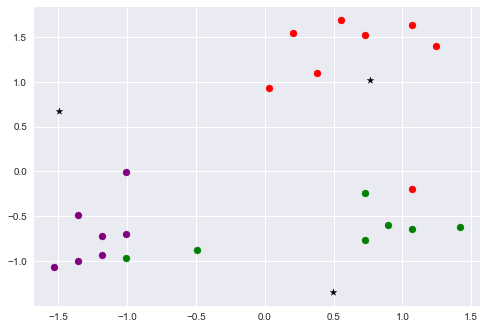

In [14]:
plotCluster(clusters)

### 3. Implementing M Step

In [15]:
def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        # if a cluster has non-zero points, we will take the mean and update that cluster
        if pts.shape[0]>0:
            new_uk = pts.mean(axis=0)          # new cluster center
            clusters[kx]['center'] = new_uk    # updating the center
        
            # emptying the list of points of that cluster as will repeat E-Step to get the points
            clusters[kx]['points'] = []

### 4. Repeating E and M steps again and again until there is no change in the value of cluster centers

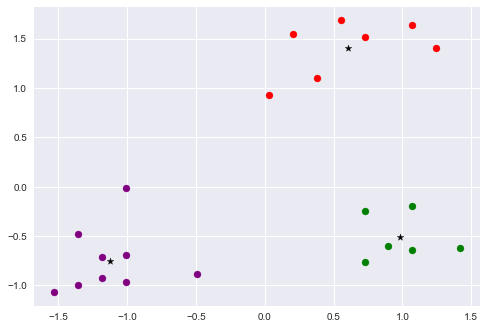

In [16]:
while(1):
  cnt = 0
  prev_center = []

  for ix in range(k):
    prev_center.append(clusters[ix]['center'])

  assignPointToClusters(clusters)
  updateClusters(clusters)
  
  for ix in range(k):
    if(all(prev_center[ix]==clusters[ix]['center'])):
      cnt+=1
  
  if(cnt==k):
    break

assignPointToClusters(clusters)
plotCluster(clusters)